In [12]:
from math import e, pi
import numpy as np

from qiskit_ionq import IonQProvider
from qiskit import QuantumCircuit, transpile, IBMQ, execute
from qiskit_aer import AerSimulator

def aer_count(circ):
    backend = AerSimulator()
    qc = transpile(circ, backend)
    job = backend.run(qc, shots = 10000) 
    result = job.result()
    counts = result.get_counts()
    print(counts)

In [7]:
def sub_iqft(n):
    circ = QuantumCircuit(n)
    for i in range(n-1):
        circ.cp(-pi/2**(n-i-1),n-i-1,0)
    circ.h(0)
    return circ

def iqft_ws(n):
    circ = QuantumCircuit(n)
    for i in range(n):
        circ.append(sub_iqft(i+1), range(n-i-1, n))
        #circ.barrier(range(n))
    return circ

def q_to_j(theta, n):
    circ = QuantumCircuit(n+1)
    for i in range(n):
        circ.cp( 2*pi*theta*(2**(i)), n-i-1, n )
    return circ

def qpe(theta, n):
    circ = QuantumCircuit(n+1,n)
    circ.h(range(n))
    circ.x(n)
    circ.append(q_to_j(theta, n), range(n+1))
    circ.append(iqft_ws(n),range(n-1,-1,-1))
    circ.measure(range(n),range(n))
    return circ

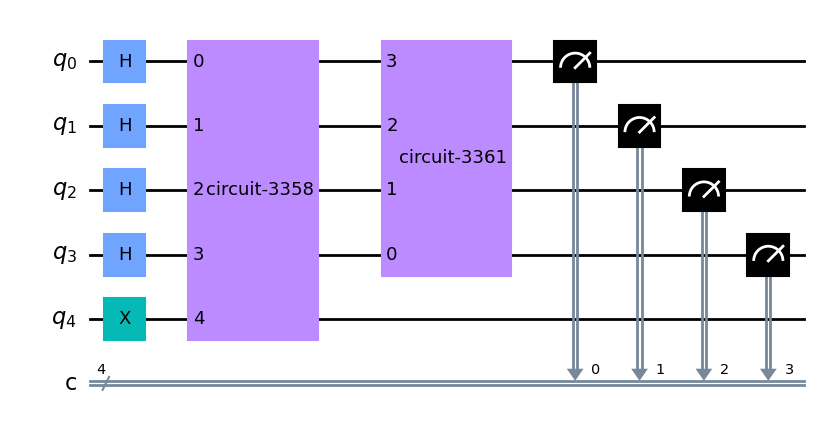

In [10]:
qpe(1/16, 4).draw('mpl')

# 4 qubit QPE

In [9]:
for i in range(16):
    aer_count(qpe(i/16,4))

{'0000': 10000}
{'0001': 10000}
{'0010': 10000}
{'0011': 10000}
{'0100': 10000}
{'0101': 10000}
{'0110': 10000}
{'0111': 10000}
{'1000': 10000}
{'1001': 10000}
{'1010': 10000}
{'1011': 10000}
{'1100': 10000}
{'1101': 10000}
{'1110': 10000}
{'1111': 10000}


# Implementation on IonQ devices

In [ ]:
theta = 530/1024
n_qubit = 10
# provider = IonQProvider("")
backend = provider.get_backend("ionq_qpu.aria-1")
circ_transpiled = transpile(qpe(theta,theta), backend)
job = execute(circ_transpiled, backend, shots= 10000)
print(job.job_id())

In [ ]:
backend = provider.get_backend("ionq_qpu.aria-1")
job_id = ''
job = backend.retrieve_job(job_id)
print(job.status())

In [ ]:
qpu_backend = provider.get_backend("ionq_qpu.aria-1")
job_id = ''
job = qpu_backend.retrieve_job(job_id)
result = job.result()
counts = result.get_counts()
print(counts)